# Stock Analysis - Part B

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [108]:
# Load stock data from file
file_path = "StockData.csv"
df = pd.read_csv(file_path)

# Extract AAPL stock prices only and rename column for clarity
aapl = df[['Trading Day', 'AAPL']].copy()
aapl.rename(columns={'AAPL': 'Close'}, inplace=True)

# Set "Trading Day" as index of the dataframe
aapl.set_index('Trading Day', inplace=True)

# Keep only the first 250 trading days of data
aapl = aapl.iloc[:250]

# Display first few rows
aapl.head()

,Close
Trading Day,
1,72.362030
2,69.910980
3,71.020020
4,66.377579
5,66.338730


In [109]:
# Compute 20-day moving average (MA)
aapl['MA_20'] = aapl['Close'].rolling(window=20).mean()

# Compute bollinger bands using population standard Deviation (ddof=0)
aapl['UB'] = aapl['MA_20'] + (2 * aapl['Close'].rolling(window=20).std(ddof=0))
aapl['LB'] = aapl['MA_20'] - (2 * aapl['Close'].rolling(window=20).std(ddof=0))

# Display first few rows with new columns
aapl.head()

,Close,MA_20,UB,LB
Trading Day,,,,
1,72.362030,NaN,NaN,NaN
2,69.910980,NaN,NaN,NaN
3,71.020020,NaN,NaN,NaN
4,66.377579,NaN,NaN,NaN
5,66.338730,NaN,NaN,NaN


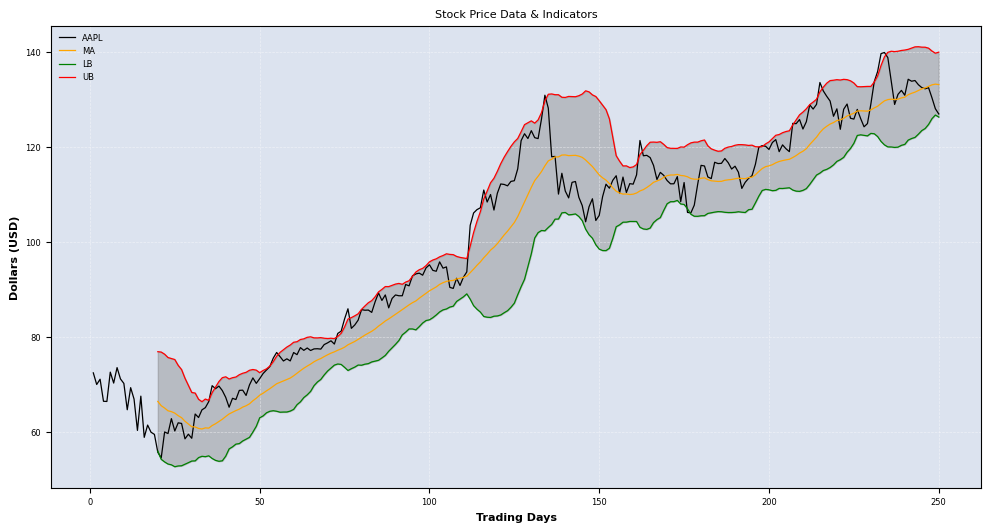

In [110]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set chart background color
ax.set_facecolor("#DCE3EF")  

# Plot lines
ax.plot(aapl.index, aapl['Close'], color='black', lw=0.9, label="AAPL")      # Closing Price
ax.plot(aapl.index, aapl['MA_20'], color='orange', lw=0.9, label="MA")    # Moving Average
ax.plot(aapl.index, aapl['LB'], color='green', lw=0.9, linestyle='solid', label="LB") # Lower Band
ax.plot(aapl.index, aapl['UB'], color='red', lw=0.9, linestyle='solid', label="UB")   # Upper Band

# Shade bollinger band area
ax.fill_between(aapl.index, aapl['UB'], aapl['LB'], color='gray', alpha=0.4)

# Title and axis labels
ax.set_title("Stock Price Data & Indicators", fontsize=8, fontweight='normal')
ax.set_xlabel("Trading Days", fontsize=8, fontweight='bold')
ax.set_ylabel("Dollars (USD)", fontsize=8, fontweight='bold')

# Adjust axis tick sizes
ax.tick_params(axis='both', which='major', labelsize=6)

# Add subtle white gridlines
ax.grid(True, color='white', linestyle='--', linewidth=0.5, alpha=0.5)

# Legend (matching background, no border, smaller size)
ax.legend(loc="upper left", facecolor="#DCE3EF", frameon=False, fontsize=6)